
# Laboratorio 1(Regresion lineal) Grupo 2
 <h3>Implementacion de Regresion lineal para entrenar el modelo, y realizar las respectivas predicciones.<h3>
 <HR>
 <h3>
  NOMBRE: <Name><br>
  CARRERA: <Carrera> <BR>
  FECHA: <Current> <BR>

  * [Enlace de invitacion para ser colaborador]()
  
  * [Enlace al git hub]()
  
  * [Enlace al Colab]()
  
 <h3>

Para el laboratorio hizo uso del dataset para La cantidad de bicicletas que pasan al alquiler por hora entre los años 2011 y 2012.el enlace al dataset es [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset).

El archivo `hour.csv` contiene un conjunto de entrenamiento con las siguientes caracteristicas:


**Especificación de cada variable de entrada.-**

- instant.- El instante en que pase.
- dteday.- fecha del registro
- season.- la temporada del registro
- yr.- el año
- mnth.- el mes del registro
- h.- hora del registro
- holiday.- Si es vacaciones o no
- weekday.- dia de la semana
- workingda.- si es dia de trabajo
- weathersit.- situacion meteorologica
- temp.- temperatura
- atemp.- Temperatura normalizada en grados Celsius. Los valores se dividen en 50 (máximo).
- hum.- Humedad normalizada. Los valores se dividen entre 100 (max)
- windspeed.- Velocidad del viento normalizada. Los valores se dividen en 67 (máx.)
- casual.- recuento de usuarios ocasionales
- registered.- recuento de usuarios registrados

**Especificación de la variable de salida.-**
- cnt.- recuento total de bicicletas de alquiler, incluidas las ocasionales y registradas




## 1. regresion lineal multivariable

In [93]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


### 1.1 Cargamos los datos del dataset
cargamos los datos haciendo el uso de la libreria **Pandas** que  es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

In [94]:
data = pd.read_csv('hour.csv', delimiter=',')

#retiramos el instant y la dteday del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['instant', 'dteday'], axis=1).astype(float)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

x_test = test_dataset.drop(['cnt'], axis=1).values
y_test = test_dataset['cnt'].values

# Seleccionamos las columnas para X y la columna 'price' para y
x_train = train_dataset.drop(['cnt'], axis=1).values
y_train = train_dataset['cnt'].values
m_train = len(y_train)

# Ahora, X y y deberían contener datos numéricos del 80% del dataset

print(f'La cantidad de caracteristicas es: {dataset.shape[1]}')
print(f'la cantidad de ejemplos es: {y_train.shape[0]}')
print(f'La cantidad de ejemplos del 80% es: {len(train_dataset)}')
print(f'La cantidad de ejemplos del 20% es: {len(test_dataset)}')
dataset

La cantidad de caracteristicas es: 15
la cantidad de ejemplos es: 13903
La cantidad de ejemplos del 80% es: 13903
La cantidad de ejemplos del 20% es: 3476


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


Haciendo un analisis de los tipos de datos para cada columna:

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  float64
 1   yr          17379 non-null  float64
 2   mnth        17379 non-null  float64
 3   hr          17379 non-null  float64
 4   holiday     17379 non-null  float64
 5   weekday     17379 non-null  float64
 6   workingday  17379 non-null  float64
 7   weathersit  17379 non-null  float64
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  float64
 13  registered  17379 non-null  float64
 14  cnt         17379 non-null  float64
dtypes: float64(15)
memory usage: 2.0 MB


<a id="section4"></a>
### 1.2 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso
### Hacemos el uso de la siguiente funcion para normalizar los datos

In [96]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


Normalizamos los datos

In [97]:
# llama featureNormalize con los datos cargados

X_norm, mu, sigma = featureNormalize(x_train)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_norm[i, 0], 
        X_norm[i, 1], 
        X_norm[i, 2], 
        X_norm[i, 3], 
        X_norm[i, 4], 
        X_norm[i, 5], 
        X_norm[i, 6], 
        X_norm[i, 7], 
        X_norm[i, 8], 
        X_norm[i, 9], 
        X_norm[i, 10], 
        X_norm[i, 11],
        X_norm[i, 12], 
        X_norm[i, 13],
    ))

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)


X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 -1.3636          -1.0041      -1.6157       -0.0806        -0.1719        1.4925       -1.4563       -0.6669       -1.5408       -1.6203        -0.3994         0.2787        -0.3627        -0.6615
  1.3469          -1.0041       1.0030        0.9322        -0.1719       -0.4963        0.6867       -0.6669        0.1171        0.1382        -1.0737        -0.6977         0.5842         1.9629
  1.3469          -1.0041       1.5849       -1.2381        -0.1719        0.0009        0.6867        2.4639       -0.1938       -0.1258         1.9346         0.2787        -0.7254        -0.9970
 -0.4601          -1.0041      -0.7

### 1.3 Graficar las caracteristicas
 graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.

In [98]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro', ms=10, mec='k')

  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)
  
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')

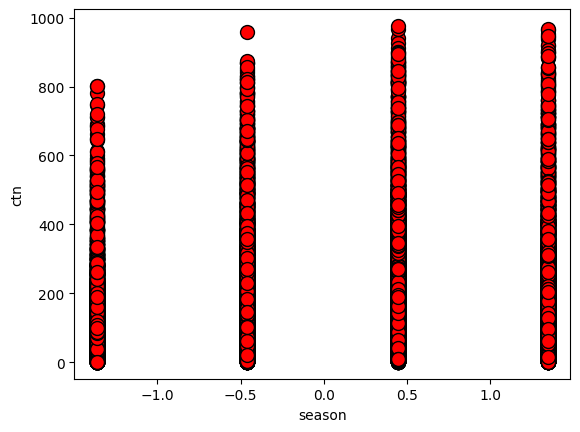

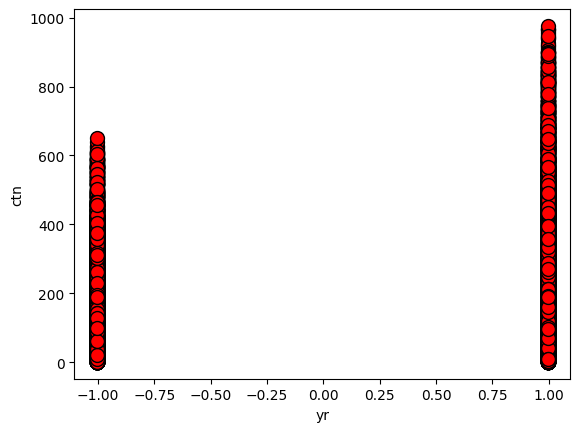

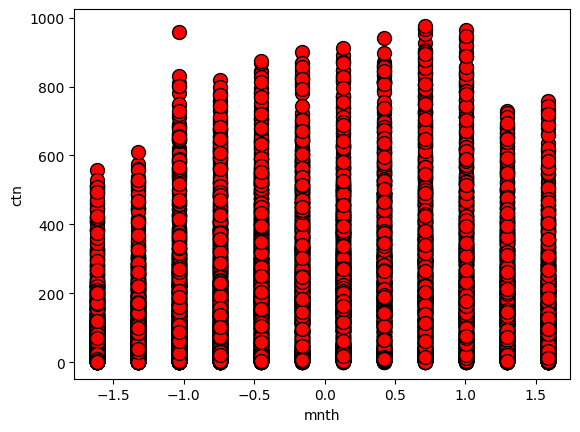

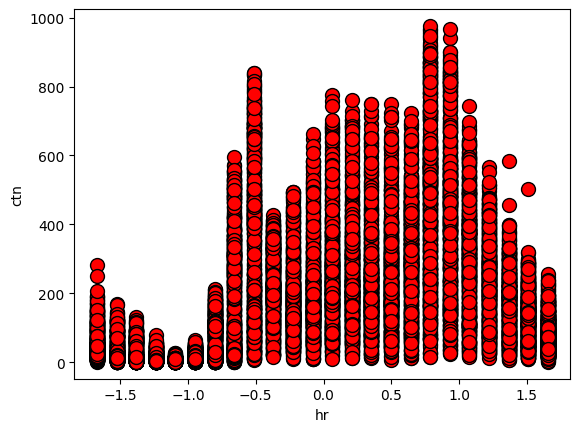

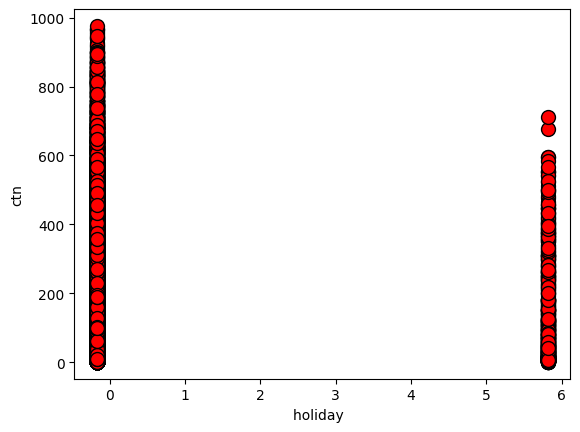

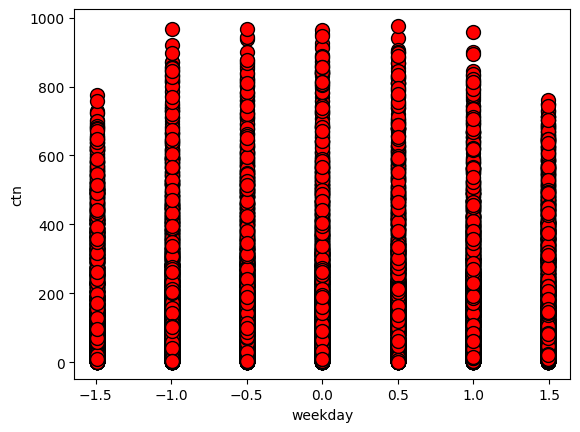

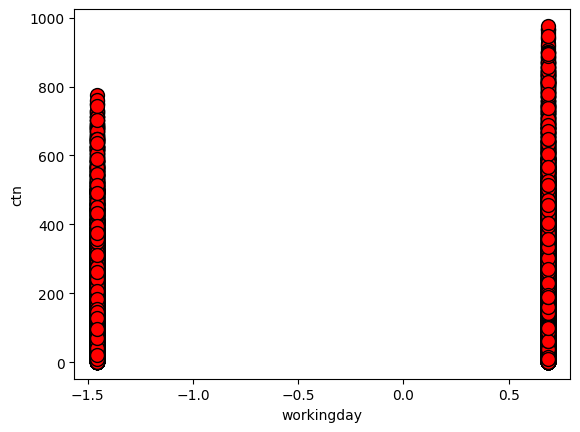

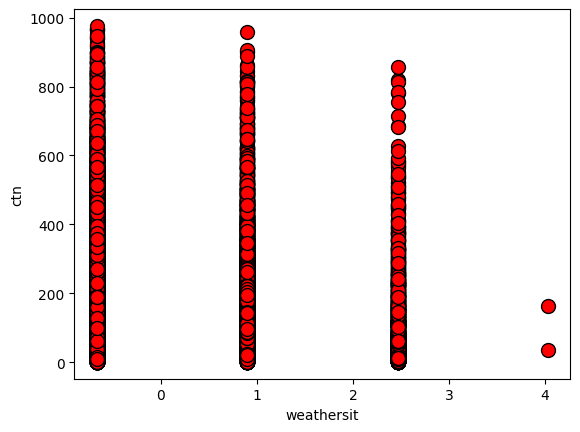

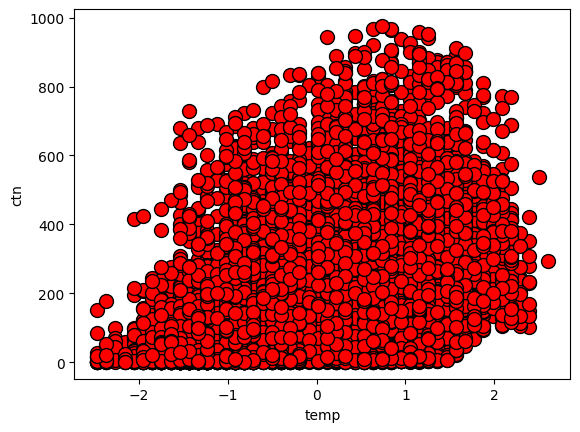

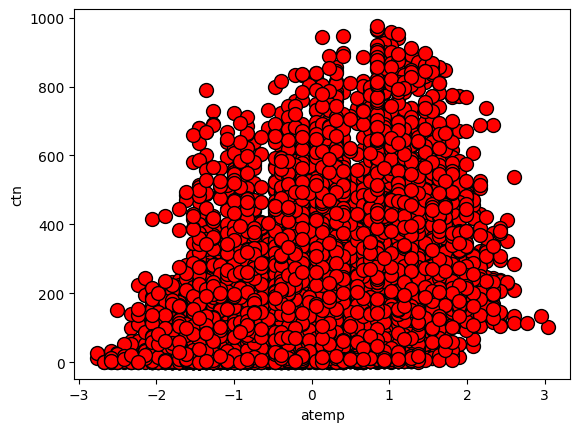

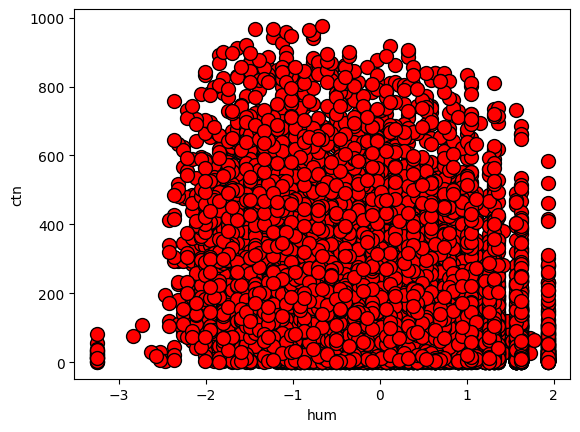

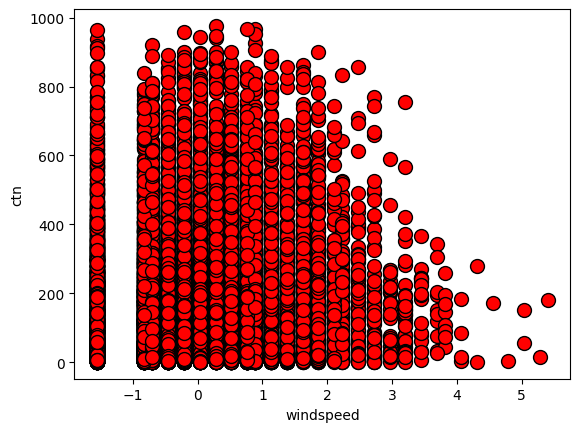

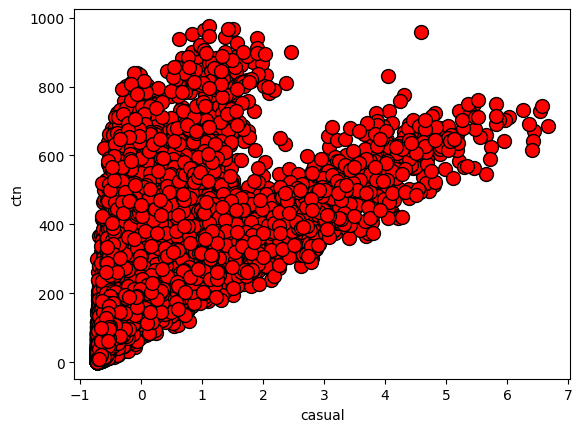

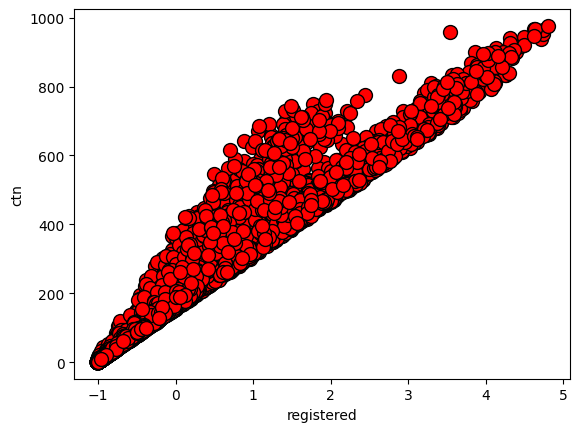

In [99]:

xlabel1 = "season"
xlabel2 = "yr"
xlabel3 = "mnth"
xlabel4 = "hr"
xlabel5 = "holiday  "
xlabel6 = "weekday"
xlabel7 = "workingday"
xlabel8 = "weathersit"
xlabel9 = "temp"
xlabel10 = "atemp"
xlabel11 = "hum"
xlabel12 = "windspeed"
xlabel13 = "casual"
xlabel14 = "registered"

ylabel1 = "ctn"
graficarDatos(X_norm[:, 0], y_train, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y_train, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y_train, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y_train, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y_train, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y_train, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y_train, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y_train, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y_train, xlabel9, ylabel1)
graficarDatos(X_norm[:, 9], y_train, xlabel10, ylabel1)
graficarDatos(X_norm[:, 10], y_train, xlabel11, ylabel1)
graficarDatos(X_norm[:, 11], y_train, xlabel12, ylabel1)
graficarDatos(X_norm[:, 12], y_train, xlabel13, ylabel1)
graficarDatos(X_norm[:, 13], y_train, xlabel14, ylabel1)


### 1.4 Descenso por el gradiente

Primero agregamos unos a la matriz de X

In [100]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)


#### 1.4.1 Cálculo del costo $J(\theta)$

In [101]:
# No olvidarse agregar unos a la matriz de x

X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]', '  X_norm[:, 14]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_ready[i, 0], 
        X_ready[i, 1], 
        X_ready[i, 2], 
        X_ready[i, 3], 
        X_ready[i, 4], 
        X_ready[i, 5], 
        X_ready[i, 6], 
        X_ready[i, 7], 
        X_ready[i, 8], 
        X_ready[i, 9], 
        X_ready[i, 10], 
        X_ready[i, 11],
        X_ready[i, 12], 
        X_ready[i, 13],
        X_ready[i, 14],
    ))

print('Media calculada:', mu, len(mu))
print('Desviación estandar calculada:', sigma, len(sigma))

X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]  X_norm[:, 14]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  1.0000          -1.3636      -1.0041       -1.6157        -0.0806       -0.1719        1.4925       -1.4563       -0.6669       -1.5408        -1.6203        -0.3994         0.2787        -0.3627        -0.6615
  1.0000           1.3469      -1.0041        1.0030         0.9322       -0.1719       -0.4963        0.6867       -0.6669        0.1171         0.1382        -1.0737        -0.6977         0.5842         1.9629
  1.0000           1.3469      -1.0041        1.5849        -1.2381       -0.1719        0.0009        0.6867        2.4639       -0.1938        -0.1258         1.9346         0.2787      

In [102]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [103]:
theta=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.5])
theta1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 0.6,0.6, 1.0, 0.3])

print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta)}")
print(f"########################################################################################################")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta1)}")

15
########################################################################################################
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 0.7 2.  0.5] se obtiene un costo de: 33673.837257784115
########################################################################################################
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3 8.  1.7 0.7 7.1 0.6 0.6 1.  0.3] se obtiene un costo de: 33475.58348979292


<a id="section3"></a>
#### 1.4.2 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico.

In [104]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [105]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(X_ready.shape[1])

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 20000
alpha = 0.0009

theta, J_historico = calcularDescensoGradiente(X_ready, y_train, theta, alpha, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: 190.5770668181319
theta 2: 0.21414211032649566
theta 3: 0.020840796749996865
theta 4: -0.1922864501654253
theta 5: 0.025255944237283796
theta 6: 0.023234536521386705
theta 7: 0.0004184890998574838
theta 8: 0.09360635205364182
theta 9: -0.020729763824394738
theta 10: -0.160870392152174
theta 11: 0.0871935115285346
theta 12: 0.04452730722195322
theta 13: 0.017775940475653788
theta 14: 49.7836995451974
theta 15: 151.9148256302002
########################################################################################################
con un costo de: 0.013595365689902888 


Se utilizan los parametros finales para grafical la linea.

### 1.5 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

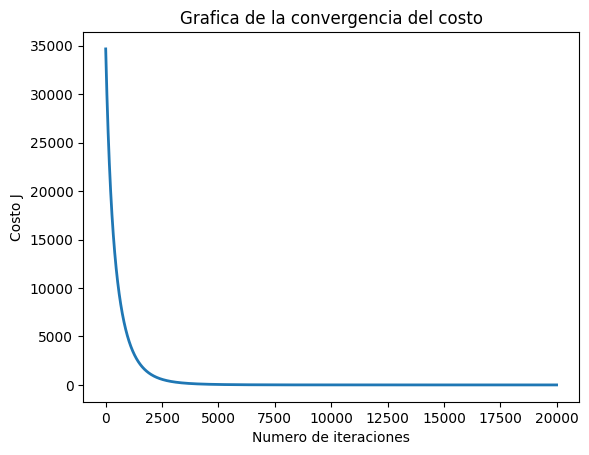

In [106]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#### 1.5.1 Grafica de la regresion lineal

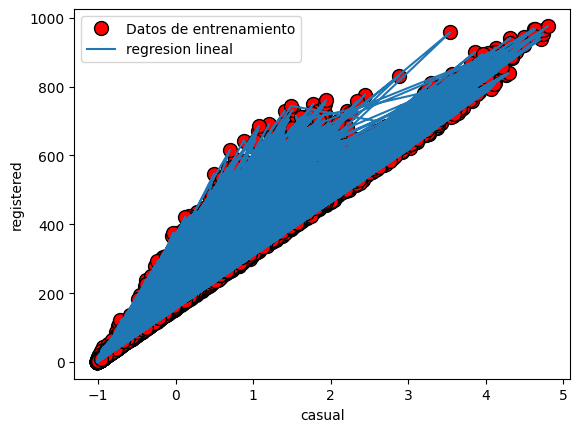

In [107]:
graficarDatos(X_ready[:, 14], y_train , xlabel13, xlabel14)

pyplot.plot(X_ready[:,14], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

### 1.6 Ejemplos de Predicciones

Se creo una matriz con 5 ejemplos, donde se hace las predicciones correspondientes:

In [108]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos = np.array([
[1,4,1,12,12,0,1,1,3,0.44,0.4394,1,0.2239,23,150],
[1,4,1,12,13,0,1,1,3,0.44,0.4394,1,0.2239,30,190],
[1,4,1,12,14,0,1,1,2,0.5,0.4848,0.94,0.2239,31,179],
[1,4,1,12,15,0,1,1,2,0.5,0.4848,0.87,0.1642,29,207],
[1,4,1,12,16,0,1,1,2,0.5,0.4848,0.88,0.1045,37,308],
])

#creamos un vector parta almacenar cada Y predicha
y_pre = []
matriz_datos_copy = matriz_datos.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos:
    datos[1:] = (datos[1:] - mu) / sigma

#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos:
    y_pre.append(np.dot(datos, theta))

matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

nombres_columnas = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


+----+----------+------+--------+------+-----------+-----------+--------------+--------------+--------+---------+-------+-------------+----------+--------------+---------+
|    |   season |   yr |   mnth |   hr |   holiday |   weekday |   workingday |   weathersit |   temp |   atemp |   hum |   windspeed |   casual |   registered |     cnt |
+====+==========+======+========+======+===========+===========+==============+==============+========+=========+=======+=============+==========+==============+=========+
|  1 |        4 |    1 |     12 |   12 |         0 |         1 |            1 |            3 |   0.44 |  0.4394 |  1    |      0.2239 |       23 |          150 | 173.1   |
+----+----------+------+--------+------+-----------+-----------+--------------+--------------+--------+---------+-------+-------------+----------+--------------+---------+
|  1 |        4 |    1 |     12 |   13 |         0 |         1 |            1 |            3 |   0.44 |  0.4394 |  1    |      0.2239 |     

### 1.7 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

#### 1.7.1 Creacion de la funcion del error cuadratico medio

In [109]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pre)


#### 1.7.2 haciendo calculo del error cuadratico medio

In [110]:
#haciendo x_test que es el 20% restante
m_test = len(y_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_test, 1)), x_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu) / sigma

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta))

mse = mean_squared_error(y_predicha, y_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 18.839720628086376
Raíz del Error Cuadrático Medio (RMSE) = 4.340474700777137
